In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [2]:
train_dir = '../../data/train'
test_dir = '../../data/test'
val_dir = '../../data/val'

In [15]:
img_size = 64
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='binary',
        color_mode='grayscale')
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='binary',
        color_mode='grayscale')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=32,
        color_mode='grayscale',
        class_mode='binary',
        shuffle=False)



Found 59428 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.
Found 8491 images belonging to 2 classes.


In [4]:
model = keras.models.Sequential([
        keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(32, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n // train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.n // validation_generator.batch_size,
      callbacks=[early_stopping]
      )

Epoch 1/100
1857/1857 [==============================] - 239s 127ms/step - loss: 0.4350 - accuracy: 0.7905 - val_loss: 0.2335 - val_accuracy: 0.9100
Epoch 2/100
1857/1857 [==============================] - 187s 101ms/step - loss: 0.2361 - accuracy: 0.9080 - val_loss: 0.1067 - val_accuracy: 0.9639
Epoch 3/100
1857/1857 [==============================] - 190s 102ms/step - loss: 0.1530 - accuracy: 0.9445 - val_loss: 0.0789 - val_accuracy: 0.9687
Epoch 4/100
1857/1857 [==============================] - 188s 101ms/step - loss: 0.1223 - accuracy: 0.9560 - val_loss: 0.0878 - val_accuracy: 0.9673
Epoch 5/100
1857/1857 [==============================] - 182s 98ms/step - loss: 0.1082 - accuracy: 0.9609 - val_loss: 0.0741 - val_accuracy: 0.9751
Epoch 6/100
1857/1857 [==============================] - 184s 99ms/step - loss: 0.1000 - accuracy: 0.9636 - val_loss: 0.0615 - val_accuracy: 0.9772
Epoch 7/100
1857/1857 [==============================] - 182s 98ms/step - loss: 0.0957 - accuracy: 0.9664 - 

In [16]:
test_loss,test_acc = model.evaluate(test_generator, steps = test_generator.n // test_generator.batch_size) 

265/265 [==============================] - 7s 27ms/step - loss: 0.0413 - accuracy: 0.9855


In [10]:
model.save('model.h5')

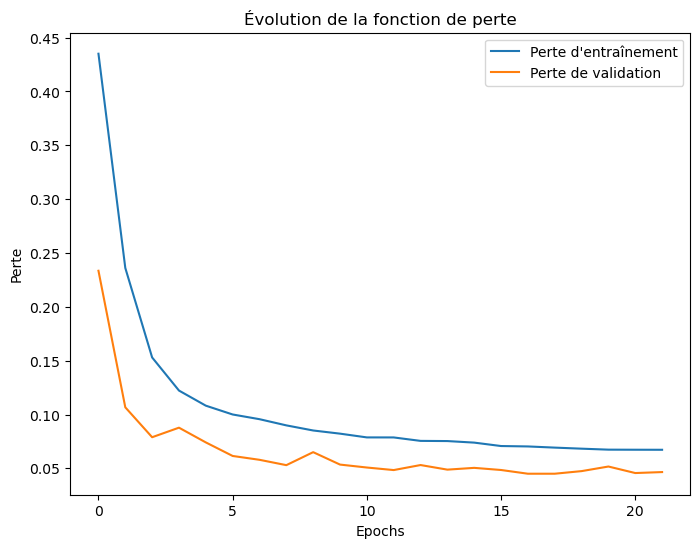

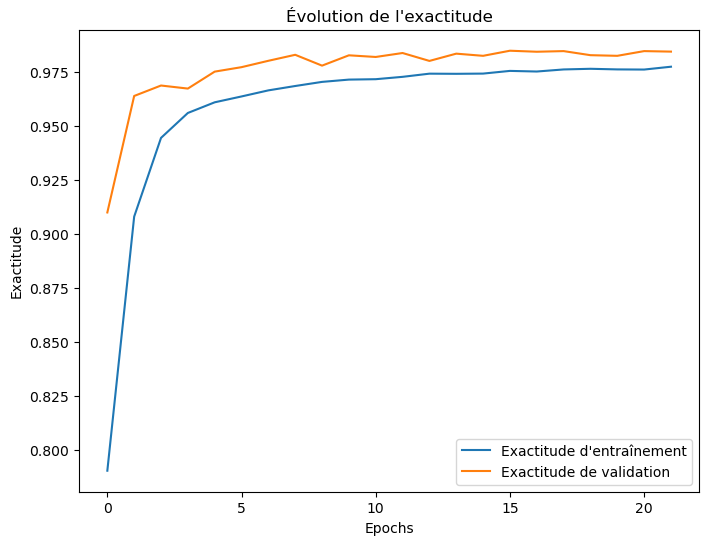

In [11]:
import matplotlib.pyplot as plt

# Récupérer l'historique de l'entraînement
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Afficher les courbes de la fonction de perte
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Perte d\'entraînement')
plt.plot(val_loss, label='Perte de validation')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.title('Évolution de la fonction de perte')
plt.legend()
plt.show()

# Afficher les courbes de l'exactitude
plt.figure(figsize=(8, 6))
plt.plot(accuracy, label='Exactitude d\'entraînement')
plt.plot(val_accuracy, label='Exactitude de validation')
plt.xlabel('Epochs')
plt.ylabel('Exactitude')
plt.title('Évolution de l\'exactitude')
plt.legend()
plt.show()

In [17]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
true_labels = test_generator.classes

# Perform predictions on the test data
predicted_classes = []

# Iterate over the test data generator and perform predictions
for images, _ in test_generator:
    # Perform predictions on the batch of images
    predictions = model.predict(images)
    batch_predictions = np.where(predictions > 0.5, 1, 0)
    
    # Append the batch predictions to the list
    predicted_classes.extend(batch_predictions)
    
    # Break the loop if we have processed all the test data
    if len(predicted_classes) >= len(true_labels):
        break

# Convert the predicted classes to a NumPy array
predicted_classes = np.array(predicted_classes)

# Compute evaluation metrics
f1 = f1_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes)
recall = recall_score(true_labels, predicted_classes)
accuracy = accuracy_score(true_labels, predicted_classes)

# Calculate loss on the test data
loss = model.evaluate(test_generator)[0]

# Print the evaluation metrics

print('Score F1 (F1 Score):', f1)
print('Précision (Precision):', precision)
print('Rappel (Recall):', recall)
print('Exactitude (Accuracy):', accuracy)
print('Perte (Loss):', loss)

266/266 [==============================] - 8s 28ms/step - loss: 0.0413 - accuracy: 0.9855
Score F1 (F1 Score): 0.9857126263212916
Précision (Precision): 0.9837699976814283
Rappel (Recall): 0.9876629422718808
Exactitude (Accuracy): 0.9855140737251207
Perte (Loss): 0.04126333072781563


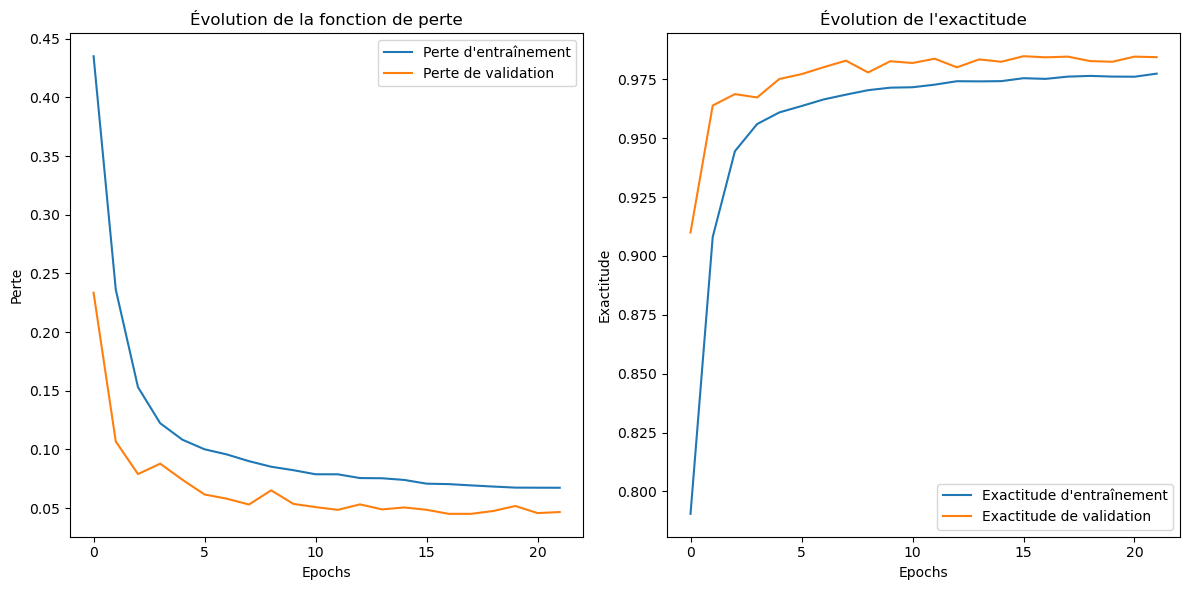

In [18]:
import matplotlib.pyplot as plt

# Récupérer l'historique de l'entraînement
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Créer une figure avec deux sous-graphes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Afficher la courbe de la fonction de perte dans le premier sous-graphe
ax1.plot(loss, label='Perte d\'entraînement')
ax1.plot(val_loss, label='Perte de validation')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Perte')
ax1.set_title('Évolution de la fonction de perte')
ax1.legend()

# Afficher la courbe de l'exactitude dans le deuxième sous-graphe
ax2.plot(accuracy, label='Exactitude d\'entraînement')
ax2.plot(val_accuracy, label='Exactitude de validation')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Exactitude')
ax2.set_title('Évolution de l\'exactitude')
ax2.legend()

# Ajuster la disposition des sous-graphes pour les aligner côte à côte
plt.tight_layout()

# Afficher le graphique
plt.show()